# Investment Comparison

## Imports:

In [825]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

from datetime import date
from dateutil.relativedelta import relativedelta

## Functions:

In [809]:
def get_value_increase_rate(start_price, end_price, delta):
    # if it's been 10 years for the asset to go from start_price to end_price, set delta to 10,
    # if it's been 12 months for the asset to go from start_price to end_price, set delta to 12,
    # etc
    return np.exp(np.log(end_price / start_price) / delta) - 1

## Constants:

In [833]:
current_date = date.today()
first_day_current_month = current_date.replace(day=1)

months = 120
future_months = [first_day_current_month + relativedelta(months=i) for i in range(months)]

## Data:

In [828]:
bitcoin_yearly_increase_rate = 25  # an assumption of 25% yearly gains since I assume it'll always beat most tech stocks, a bit conservative if you ask me
real_estate_10yr_percentage_increase = 100  # based on local market and zillow
real_estate_yearly_rent_increase = 4  # https://www.redfin.com/blog/how-much-should-rent-increase-per-year/
qqq_yearly_increase_rate = 15  # it's increased by an average of 15% yearly since 2005
qqq_yearly_dividend_rate = 0.6  # https://www.nasdaq.com/market-activity/etf/qqq/dividend-history
aapl_yearly_increase_rate = 24  # it's increased by an average of 24% yearly since 1995, https://www.dividendchannel.com/history/?symbol=aapl
aapl_yearly_dividend_rate = 0.4  # https://www.nasdaq.com/market-activity/stocks/aapl/dividend-history

stats = {
    "bitcoin":
    {
        "monthly_value_increase": get_value_increase_rate(1, 1 * (1 + bitcoin_yearly_increase_rate / 100), 12),
        "monthly_income_increase": 0
    },
    "real_estate":
    {
        "monthly_value_increase": get_value_increase_rate(1, 1 * (1 + real_estate_10yr_percentage_increase / 100), 120),
        "yearly_income_increase": get_value_increase_rate(1, 1 * (1 + real_estate_yearly_rent_increase / 100), 1)
    },
    "QQQ":
    {
        "monthly_value_increase": get_value_increase_rate(1, 1 * (1 + qqq_yearly_increase_rate / 100), 12),
        "yearly_income_increase": get_value_increase_rate(1, 1 * (1 + qqq_yearly_dividend_rate / 100), 1)
    },
    "AAPL":
    {
        "monthly_value_increase": get_value_increase_rate(1, 1 * (1 + aapl_yearly_increase_rate / 100), 12),
        "yearly_income_increase": get_value_increase_rate(1, 1 * (1 + aapl_yearly_dividend_rate / 100), 1)
    }
}

# asset value data
initial_investment = 100000
bitcoin_values = np.array([initial_investment * (1 + stats["bitcoin"]["monthly_value_increase"]) ** i for i in range(len(future_months))])
real_estate_values = np.array([initial_investment * (1 + stats["real_estate"]["monthly_value_increase"]) ** i for i in range(len(future_months))])
qqq_values = np.array([initial_investment * (1 + stats["QQQ"]["monthly_value_increase"]) ** i for i in range(len(future_months))])
aapl_values = np.array([initial_investment * (1 + stats["AAPL"]["monthly_value_increase"]) ** i for i in range(len(future_months))])

# asset income data
bitcoin_income = np.zeros(len(future_months))
bitcoin_income_cumulative = np.cumsum(bitcoin_income)
real_estate_mortgage = 5000  # a 100000 down payment is 20% of 500000, so I'm assuming a 1% rental rate
real_estate_initial_rent = 5000
real_estate_rental_income = real_estate_initial_rent * np.power(1 + stats["real_estate"]["yearly_income_increase"], np.arange(len(future_months)) // 12) - real_estate_mortgage
real_estate_rental_income_cumulative = np.cumsum(real_estate_rental_income)
qqq_dividend_income = [qqq_values[i] * stats["QQQ"]["yearly_income_increase"] / 4 if i % 3 == 2 else 0 for i in range(len(future_months))]
qqq_dividend_income_cumulative = np.cumsum(qqq_dividend_income)
aapl_dividend_income = [aapl_values[i] * stats["AAPL"]["yearly_income_increase"] / 4 if i % 3 == 2 else 0 for i in range(len(future_months))]
aapl_dividend_income_cumulative = np.cumsum(aapl_dividend_income)

## Plots:

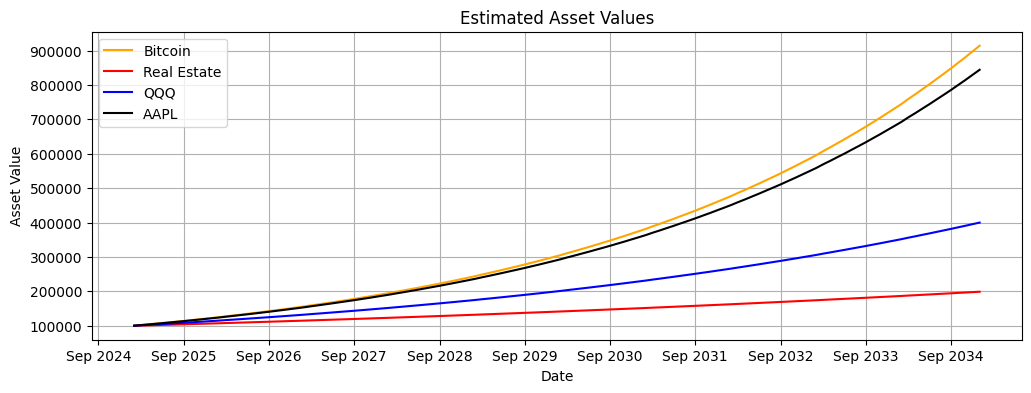

In [829]:
plt.figure(figsize=(12, 4))

data = [bitcoin_values, real_estate_values, qqq_values, aapl_values]
labels = ["Bitcoin", "Real Estate", "QQQ", "AAPL"]
colors = ["orange", "red", "blue", "black"]

for d, l, c in zip(data, labels, colors):
    plt.plot(future_months, d, color=c, label=l)

plt.title("Estimated Asset Values")
plt.xlabel("Date")
plt.ylabel("Asset Value")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=(len(future_months) // 10)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

plt.grid()
plt.legend(loc="upper left")

plt.show()

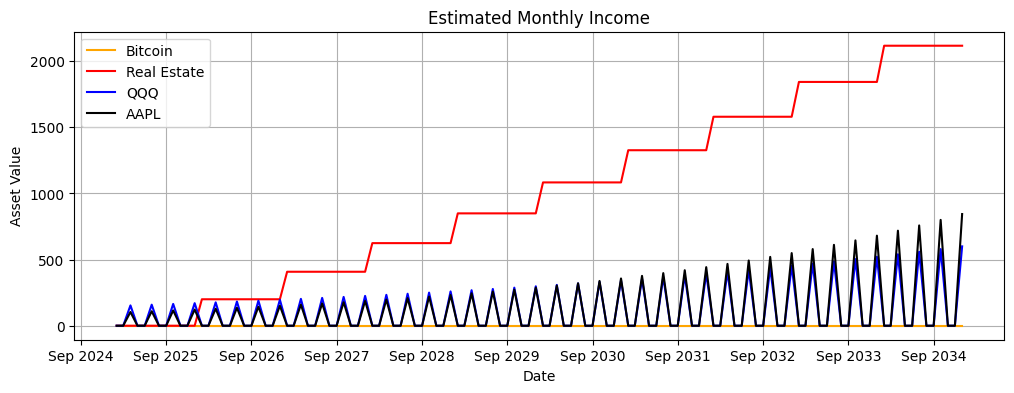

In [830]:
plt.figure(figsize=(12, 4))

data = [bitcoin_income, real_estate_rental_income, qqq_dividend_income, aapl_dividend_income]
labels = ["Bitcoin", "Real Estate", "QQQ", "AAPL"]
colors = ["orange", "red", "blue", "black"]

for d, l, c in zip(data, labels, colors):
    plt.plot(future_months, d, color=c, label=l)

plt.title("Estimated Monthly Income")
plt.xlabel("Date")
plt.ylabel("Asset Value")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=(len(future_months) // 10)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

plt.grid()
plt.legend(loc="upper left")

plt.show()

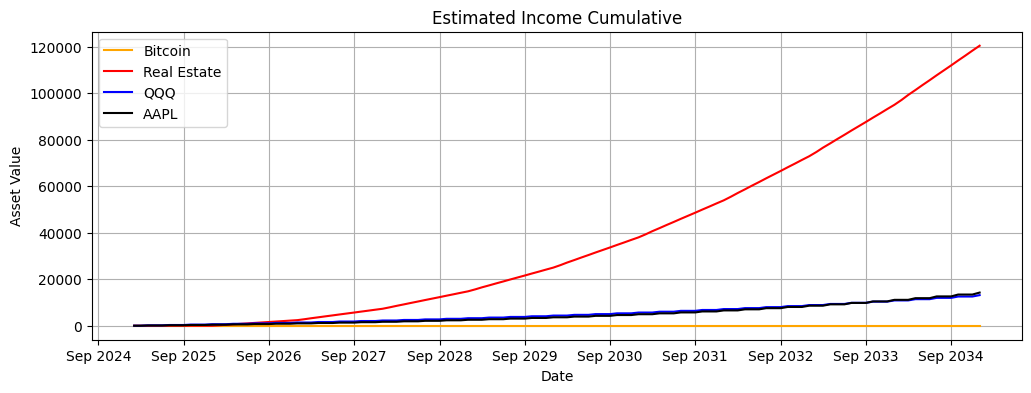

In [831]:
plt.figure(figsize=(12, 4))

data = [bitcoin_income_cumulative, real_estate_rental_income_cumulative, qqq_dividend_income_cumulative, aapl_dividend_income_cumulative]
labels = ["Bitcoin", "Real Estate", "QQQ", "AAPL"]
colors = ["orange", "red", "blue", "black"]

for d, l, c in zip(data, labels, colors):
    plt.plot(future_months, d, color=c, label=l)

plt.title("Estimated Income Cumulative")
plt.xlabel("Date")
plt.ylabel("Asset Value")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=(len(future_months) // 10)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

plt.grid()
plt.legend(loc="upper left")

plt.show()

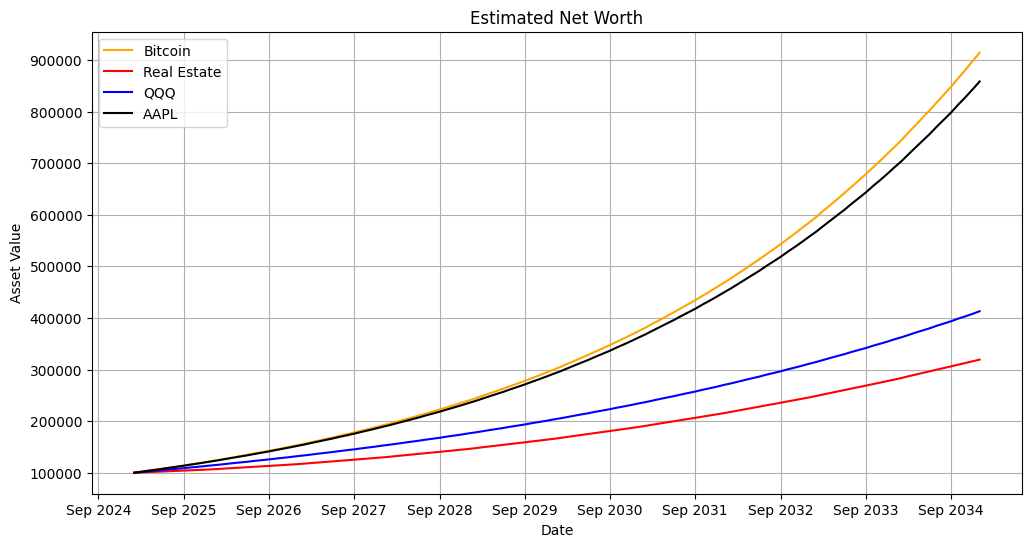

In [832]:
plt.figure(figsize=(12, 6))

data = [
    bitcoin_values + bitcoin_income_cumulative,
    real_estate_values + real_estate_rental_income_cumulative,
    qqq_values + qqq_dividend_income_cumulative,
    aapl_values + aapl_dividend_income_cumulative
]

labels = ["Bitcoin", "Real Estate", "QQQ", "AAPL"]
colors = ["orange", "red", "blue", "black"]

for d, l, c in zip(data, labels, colors):
    plt.plot(future_months, d, color=c, label=l)

plt.title("Estimated Net Worth")
plt.xlabel("Date")
plt.ylabel("Asset Value")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=(len(future_months) // 10)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

plt.grid()
plt.legend(loc="upper left")

plt.show()

## Findings:

- When it comes to asset growth, BTC destroys everything else.
- When it comes to income, the house dominates, and BTC is nonexistent. Tech stocks are in the middle, closer to BTC.
- Real estate income is the closest thing to replacing a job, which makes sense since it’s a job itself.
- After 30 years, or whenever the mortgage is paid, real estate income will skyrocket due to not having to pay the mortgage monthly.
- Does not take into account how much equity from each mortgage payment is added to the house, since it assumes you don’t sell the house and instead keep it for rental purposes 100% of the time. Also doesn't take into account property taxes or repairs.
- Buy Bitcoin.